# Titanic Disaster: Survivability Parameters

-[Problem Statement](#problem-statement)
    - [Dataset Description](#dataset-description)
- [Dataset Exploration](#dataset-exploration)
    - [Analysis](#analysis)
    - [Dataset Plots](#dataset-plots)
- [Age](#age)
    - [Dealing with NaN ages](#dealing-with-nan-ages)
    - [Age Histogram Comparison](#age-histogram-comparison)
    - [Age Mosaic](#age-mosaic)
- [Survival](#survival)
    - [Pclass](#pclass)
        - [Conclusions](#conclusions-pclass)
    - [Sex](#sex)
        * [Conclusions](#conclusions-sex)
    - [Embarked](#embarked)
        - [Conclusions](#conclusions-embarked)
- [Statistics](#statistics)
    - [OLS Regression Models](#ols-regression-models)
    - [Conclusions](#conclusions)

## Problem Statement

* Using data analysis methods, predict which metric or combination of metrics best predict passenger survivability.
* A combination of data visualizations and statistics will be used to determine the most significant predictors of survivability.

### Dataset Description 

([data/titanic.csv](data/titanic.csv))

| Variable     | Definition                          | Key                                      |
|--------------|-------------------------------------|------------------------------------------|
| PassengerId  | Passenger ID                        | NA                                       |
| Survival     | Survival                            | 0 = No, 1 = Yes                          |
| Pclass       | Ticket class                        | 1 = 1st, 2 = 2nd, 3 = 3rd                |
| Name         | Passenger name                      | NA                                       |
| Sex          | Sex                                 | NA                                       |
| Age          | Age in years                        | NA                                       |
| SibSp        | # of siblings / spouses aboard the Titanic | NA                                |
| Parch        | # of parents / children aboard the Titanic | NA                                |
| Ticket       | Ticket number                       | NA                                       |
| Fare         | Passenger fare                      | NA                                       |
| Cabin        | Cabin number                        | NA                                       |
| Embarked     | Port of Embarkation                 | C = Cherbourg, Q = Queenstown, S = Southampton |


In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

titanic_df = pd.read_csv('data/titanic.csv')

## Dataset Exploration

In [153]:
# Head of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
# Tail of the dataset
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [155]:
# Determine which parameters have missing values
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Analysis
* Name, SibSp, Parch, Ticket and Fare will not be used
* Cabin will not be used because less than 25% of passengers have cabin data
* Missing Age data will be filled in the [Age](#age) section
* Missing Embarked data will be ignored
* Some new fields are needed to make some calculations easier

In [156]:
# Give Sex a numeric value; 0 = male, 1 = female
titanic_df['Sex_Numeric'] = (titanic_df['Sex'].astype('category')).cat.codes

In [157]:
grouped_survived = titanic_df.groupby(['Sex_Numeric', 'Pclass', 'Age', 'Embarked'])

In [158]:
grouped_survived['Survived'].describe()

count  mean  std  min  25%  50%  75%  max
Sex_Numeric Pclass Age  Embarked                                           
0           1      2.0  S           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                   14.0 S           1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0
                   15.0 S           1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0
                   16.0 C           1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        S           2.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
...                                 ...   ...  ...  ...  ...  ...  ...  ...
1           3      59.0 S           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                   61.0 S           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                   65.0 Q           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                   70.5 Q           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                   74.0 S           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0

[367 rows x 8 columns]

In [159]:
# Create Survival Label Column
titanic_df['Survival'] = titanic_df.Survived.map({0 : 'Died', 1 : 'Survived'}).astype('category')
titanic_df.Survival.head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survival, dtype: category
Categories (2, object): ['Died', 'Survived']

In [160]:
# Create Pclass Label Column (Pclass is a proxy for socio-economic status (SES))
titanic_df['Class'] = titanic_df.Pclass.map({1 : 'Upper Class', 2 : 'Middle Class', 3 : 'Lower Class'})
titanic_df.Class.head()

0    Lower Class
1    Upper Class
2    Lower Class
3    Upper Class
4    Lower Class
Name: Class, dtype: object

In [161]:
# Adjust Sex Label Column
titanic_df['Sex'] = titanic_df.Sex.map({'female' : 'Female', 'male' : 'Male'}).astype('category')
titanic_df.Sex.head()

0      Male
1    Female
2    Female
3    Female
4      Male
Name: Sex, dtype: category
Categories (2, object): ['Female', 'Male']

In [162]:
# Create Port Label Column
titanic_df['Ports'] = titanic_df.Embarked.map({'S' : 'Southampton', 'C' : 'Cherbourg', 'Q' : 'Queenstown', None : 'unknown'}).astype('category')
titanic_df.Ports.head()

0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
Name: Ports, dtype: category
Categories (3, object): ['Cherbourg', 'Queenstown', 'Southampton']

### Dataset Plots

<Figure size 2000x1500 with 0 Axes>

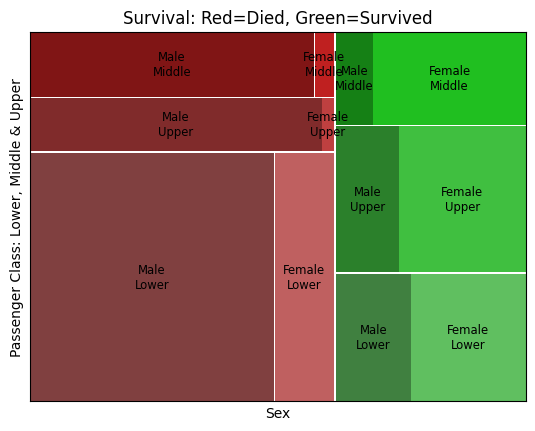

In [163]:
# Mosaic Chart
plt.figure(figsize=(20, 15))
from statsmodels.graphics.mosaicplot import mosaic

# Simplify mosaic labeling
from itertools import product
lst = list(product(titanic_df.Survival.unique(), titanic_df.Class.unique(), titanic_df.Sex.unique())) # list of all combinations of Survival, Class, Sex
dic = {lst[i]: f'{lst[i][2]}\n{lst[i][1].split()[0]}' for i in range(len(lst))} # dict of {combination: Sex *newline* FirstWordOfClass}

mosaic(titanic_df, ['Survival', 'Class', 'Sex'], axes_label=False, title='Survival: Red=Died, Green=Survived', labelizer=lambda k: dic[k])
plt.xlabel('Sex')
plt.ylabel('Passenger Class: Lower, Middle & Upper')
plt.show()

Text(0.5, 0, 'Age Categories by Decade (years)')

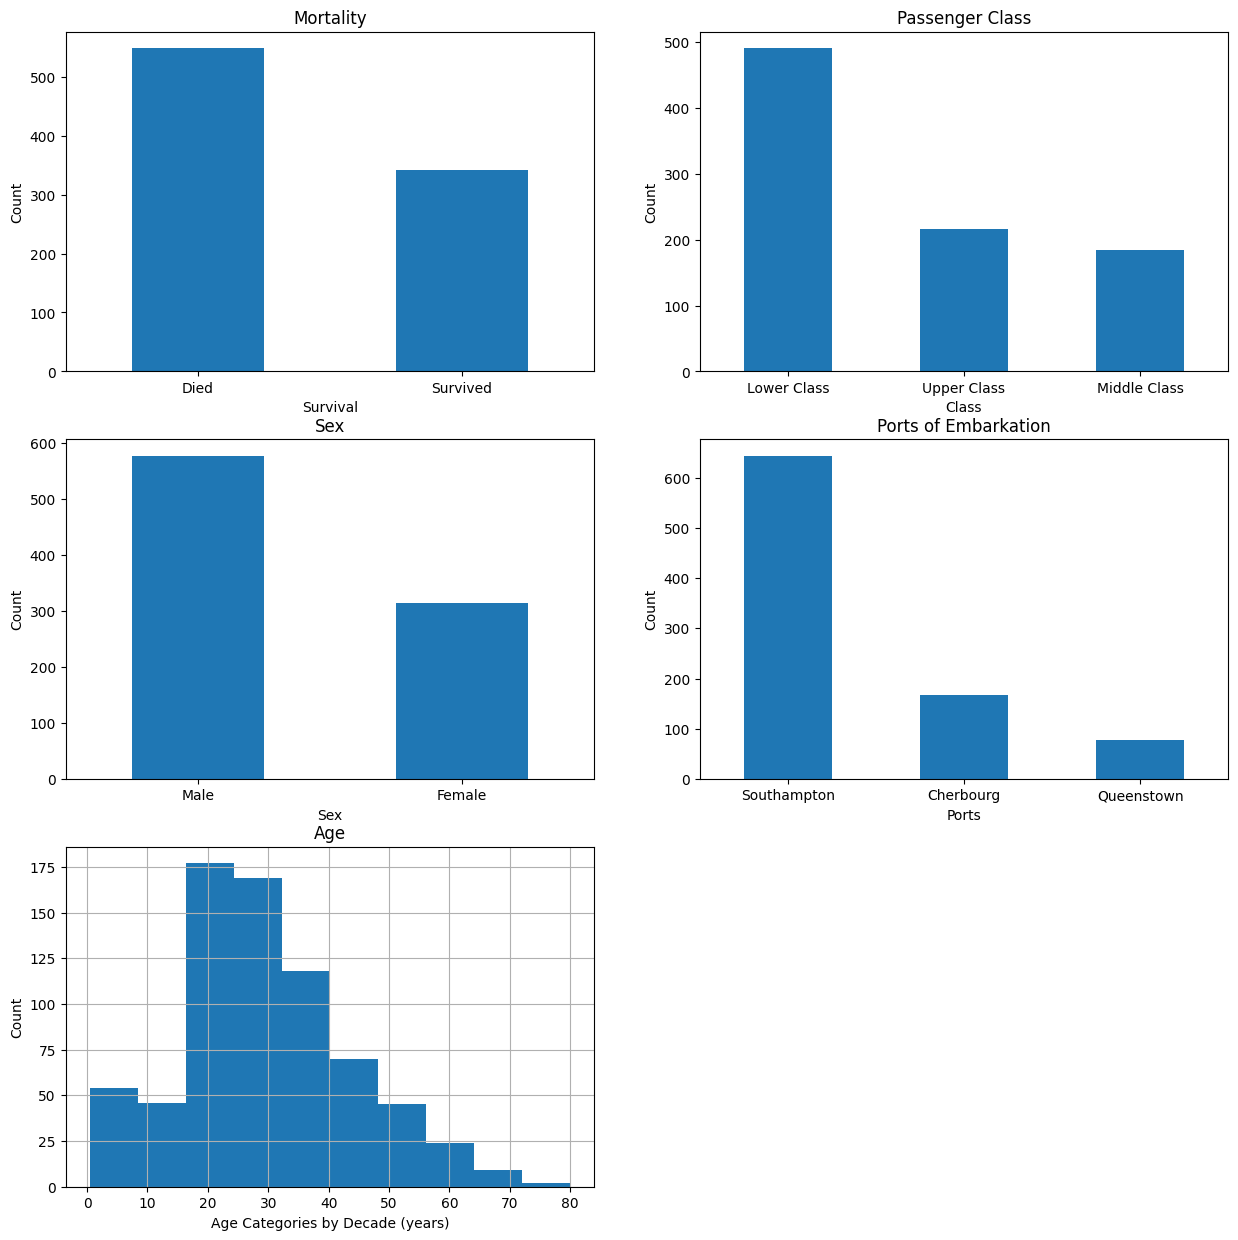

In [164]:
# Figure size
plt.figure(figsize=(15, 15))
# Histogram bin size
bin_size = 10

# Setup a figue of plots
#fig = plt.figure() 
fig_size = (3, 2)

# Plot mortality counts
plt.subplot2grid(fig_size, (0, 0))
titanic_df['Survival'].value_counts().plot(kind='bar', title='Mortality')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Pclass counts
plt.subplot2grid(fig_size, (0, 1))
titanic_df['Class'].value_counts().plot(kind='bar', title='Passenger Class')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Sex counts
plt.subplot2grid(fig_size, (1, 0))
titanic_df['Sex'].value_counts().plot(kind='bar', title='Sex')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Port counts
plt.subplot2grid(fig_size, (1, 1))
titanic_df['Ports'].value_counts().plot(kind='bar', title='Ports of Embarkation')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Age histogram
plt.subplot2grid(fig_size, (2, 0))
titanic_df['Age'].hist()
plt.title('Age')
plt.ylabel('Count')
plt.xlabel('Age Categories by Decade (years)')

## Age

In [165]:
# Passangers with no age
ageisnull = titanic_df[titanic_df['Age'].isnull()]
ageisnull.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Numeric,Survival,Class,Ports
5,6,0,3,"Moran, Mr. James",Male,NaN,0,0,330877,8.4583,NaN,Q,1,Died,Lower Class,Queenstown
17,18,1,2,"Williams, Mr. Charles Eugene",Male,NaN,0,0,244373,13.0000,NaN,S,1,Survived,Middle Class,Southampton
19,20,1,3,"Masselmani, Mrs. Fatima",Female,NaN,0,0,2649,7.2250,NaN,C,0,Survived,Lower Class,Cherbourg
26,27,0,3,"Emir, Mr. Farred Chehab",Male,NaN,0,0,2631,7.2250,NaN,C,1,Died,Lower Class,Cherbourg
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",Female,NaN,0,0,330959,7.8792,NaN,Q,0,Survived,Lower Class,Queenstown


In [166]:
print('Total passengers with no age: ', len(ageisnull))

Total passengers with no age:  177


### Dealing with NaN ages
In the [Dataset Exploration](#dataset-exploration) section, it was determined there were only 714 of 891 valid age related records.  We can see there are 177 NaN entries for Age.

A decision is required to determine the best method of dealing with NaN values.
* The NaN values can be ignored
* NaN can be filled in with a value, typically a mean
    * BUT: Comparing the counts for various groups leads to the conclusion, simply using the overall mean will heavily weigh one specific age and skew any age dependant results.

For the remainder of this analytic process, the NaN values data will be replaced with a mean age based upon Pclass, Survived and Sex.

Need a new category called Age_Fill and fill NaN with an age based upon the mean of Pclass, Survived and Sex.

In [167]:
# Mean age
titanic_df['Age'].mean()

29.69911764705882

In [168]:
# Mean age by Sex
(titanic_df.groupby(['Sex']))['Age'].mean()

C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_26424\1221062634.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (titanic_df.groupby(['Sex']))['Age'].mean()


Sex
Female    27.915709
Male      30.726645
Name: Age, dtype: float64

In [169]:
# Mean age by Class and Sex
(titanic_df.groupby(['Class', 'Sex']))['Age'].mean()

C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_26424\1190425340.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (titanic_df.groupby(['Class', 'Sex']))['Age'].mean()


Class         Sex   
Lower Class   Female    21.750000
              Male      26.507589
Middle Class  Female    28.722973
              Male      30.740707
Upper Class   Female    34.611765
              Male      41.281386
Name: Age, dtype: float64

In [170]:
# Mean age by Pclass, Survived and Sex
(titanic_df.groupby(['Class', 'Survival', 'Sex']))['Age'].mean()

C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_26424\2898955004.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (titanic_df.groupby(['Class', 'Survival', 'Sex']))['Age'].mean()


Class         Survival  Sex   
Lower Class   Died      Female    23.818182
                        Male      27.255814
              Survived  Female    19.329787
                        Male      22.274211
Middle Class  Died      Female    36.000000
                        Male      33.369048
              Survived  Female    28.080882
                        Male      16.022000
Upper Class   Died      Female    25.666667
                        Male      44.581967
              Survived  Female    34.939024
                        Male      36.248000
Name: Age, dtype: float64

In [171]:
# General statistics of Age by Class, Survival and Sex
(titanic_df.groupby(['Class', 'Survival', 'Sex']))['Age'].describe()

C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_26424\2979568992.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (titanic_df.groupby(['Class', 'Survival', 'Sex']))['Age'].describe()


count       mean        std    min    25%   50%  \
Class        Survival Sex                                                       
Lower Class  Died     Female   55.0  23.818182  12.833465   2.00  15.25  22.0   
                      Male    215.0  27.255814  12.135707   1.00  20.00  25.0   
             Survived Female   47.0  19.329787  12.303246   0.75  13.50  19.0   
                      Male     38.0  22.274211  11.555786   0.42  16.50  25.0   
Middle Class Died     Female    6.0  36.000000  12.915107  24.00  26.25  32.5   
                      Male     84.0  33.369048  12.158125  16.00  24.75  30.5   
             Survived Female   68.0  28.080882  12.764693   2.00  21.75  28.0   
                      Male     15.0  16.022000  19.547122   0.67   1.00   3.0   
Upper Class  Died     Female    3.0  25.666667  24.006943   2.00  13.50  25.0   
                      Male     61.0  44.581967  14.457749  18.00  33.00  45.5   
             Survived Female   82.0  34.939024  13.223014  14.00  23.25  35.0   
                      Male     40.0  36.248000  14.936744   0.92  27.00  36.0   

                                75%   max  
Class        Survival Sex                  
Lower Class  Died     Female  31.00  48.0  
                      Male    34.00  74.0  
             Survived Female  26.50  63.0  
                      Male    29.75  45.0  
Middle Class Died     Female  42.50  57.0  
                      Male    39.00  70.0  
             Survived Female  35.25  55.0  
                      Male    31.50  62.0  
Upper Class  Died     Female  37.50  50.0  
                      Male    56.00  71.0  
             Survived Female  44.00  63.0  
                      Male    48.00  80.0

In [172]:
# Survival count by Sex, Pclass and Age < 20
sex = titanic_df['Sex']
survived = titanic_df['Survival']
pclass = titanic_df['Class']
age_youth = titanic_df['Age'] < 20

pd.crosstab([sex, pclass, age_youth.rename('U20')], survived)

Survival                   Died  Survived
Sex    Class        U20                  
Female Lower Class  False    51        48
                    True     21        24
       Middle Class False     6        54
                    True      0        16
       Upper Class  False     2        78
                    True      1        13
Male   Lower Class  False   249        35
                    True     51        12
       Middle Class False    82         7
                    True      9        10
       Upper Class  False    74        41
                    True      3         4

In [173]:
# Maintain Age and create Age_Fill (populate missing ages)
titanic_df['Age_Fill'] = titanic_df['Age']

# Populate Age_Fill
titanic_df['Age_Fill'] = titanic_df['Age_Fill'] \
    .groupby([titanic_df['Class'], titanic_df['Survived'], titanic_df['Sex']], group_keys=False) \
    .apply(lambda x: x.fillna(x.mean()))

C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_26424\1296634877.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([titanic_df['Class'], titanic_df['Survived'], titanic_df['Sex']], group_keys=False) \


In [174]:
# Example of Age_Fill - #5, 17 & 19
titanic_df[['Age', 'Age_Fill']].head(20)

,Age,Age_Fill
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
5,NaN,27.255814
6,54.0,54.000000
7,2.0,2.000000
8,27.0,27.000000
9,14.0,14.000000


### Age Histogram Comparison

C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_26424\1413585821.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


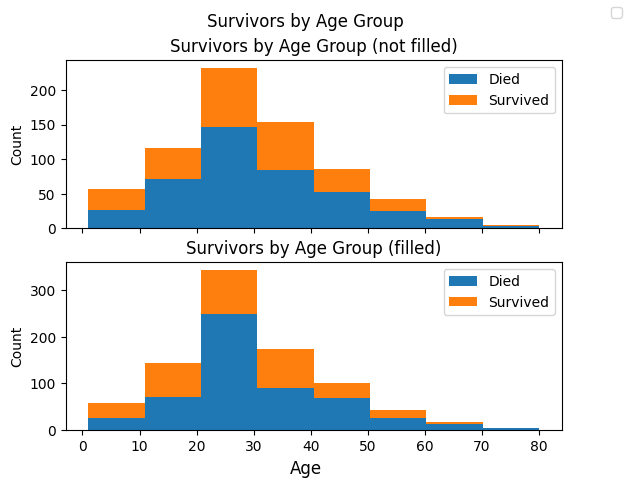

In [175]:
# Set figure
from matplotlib.axes import Axes


fig, ax = plt.subplots(2, sharex=True)#figure(figsize=(10, 10))

# Setup a figue of plots

df1 = titanic_df[titanic_df['Survived'] == 0]['Age']
df2 = titanic_df[titanic_df['Survived'] == 1]['Age']
df3 = titanic_df[titanic_df['Survived'] == 0]['Age_Fill']
df4 = titanic_df[titanic_df['Survived'] == 1]['Age_Fill']

fig.legend(('Died', 'Survived'))
fig.suptitle('Survivors by Age Group')
fig.supxlabel('Age')

max_age = max(titanic_df['Age_Fill'])

plot:Axes = ax[0]
plot.hist([df1, df2], 
             bins=8, 
             range=(1, max_age), 
             stacked=True)

plot.legend(('Died', 'Survived'))
plot.set_title('Survivors by Age Group (not filled)')
plot.set_ylabel('Count')

plot = ax[1]
plot.hist([df3, df4], 
             bins=8, 
             range=(1, max_age), 
             stacked=True)

plot.legend(('Died', 'Survived'))
plot.set_title('Survivors by Age Group (filled)')
plot.set_ylabel('Count')

fig.show()

**Age Categories**

An Age_Categories column is required in the dataframe to simplify certain visualizations and calculations, as there are too many individual ages to easily draw conclusions or see patterns.

In [176]:
# Maximum age - used to define upper bound of bins
titanic_df['Age'].max()

80.0

In [177]:
# Create a new column that has all ages by bin category: 0-10:10, 10-20:20, 20-30:30, 30-40:40
# 40-50:50, 50-60:60, 60-70:70, 70-80:80
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
group_names = [10, 20, 30, 40, 50, 60, 70, 80]

titanic_df['Age_Categories'] = pd.cut(titanic_df['Age_Fill'], bins, labels=group_names)

titanic_df[['Age', 'Age_Fill', 'Age_Categories']].head()

,Age,Age_Fill,Age_Categories
0,22.0,22.0,30
1,38.0,38.0,40
2,26.0,26.0,30
3,35.0,35.0,40
4,35.0,35.0,40


In [178]:
titanic_df['Age_Categories'] = pd.to_numeric(titanic_df['Age_Categories'])

In [179]:
# Survival Count by Age_Categories
titanic_df.groupby('Survival')[['Age_Categories']].count()

C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_26424\593309210.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby('Survival')[['Age_Categories']].count()


,Age_Categories
Survival,
Died,549
Survived,342


### Age Mosaic

<Figure size 1800x600 with 0 Axes>

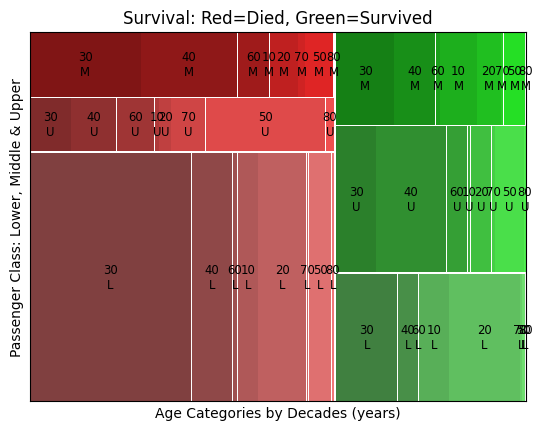

In [180]:
age_lst = list(product(titanic_df.Survival.unique(), titanic_df.Class.unique(), titanic_df.Age_Categories.astype(str).unique())) # list of all combinations of Survival, Class, Age_Categories
age_dic = {age_lst[i]: f'{age_lst[i][2]}\n{age_lst[i][1][0]}' for i in range(len(age_lst))} # dict of {combination: Age_Category *new line* FirstCharOfClass}

# Mosaic Plot
plt.figure(figsize=(18, 6)) # figure size
from statsmodels.graphics.mosaicplot import mosaic
mosaic(titanic_df,['Survival', 'Class', 'Age_Categories'], axes_label=False, title='Survival: Red=Died, Green=Survived', labelizer=lambda k: age_dic[k])
plt.xlabel('Age Categories by Decades (years)')
plt.ylabel('Passenger Class: Lower, Middle & Upper')
plt.show()

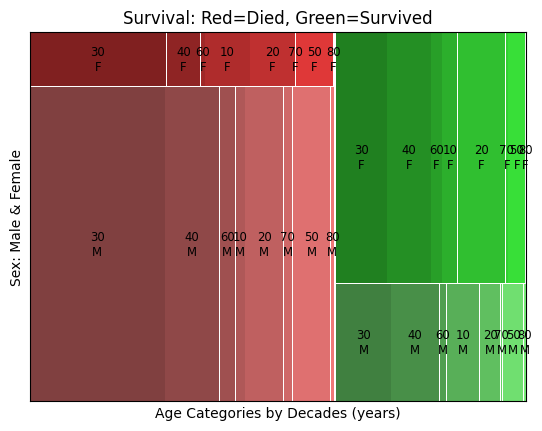

In [181]:
age_lst = list(product(titanic_df.Survival.unique(), titanic_df.Sex.unique(), titanic_df.Age_Categories.astype(str).unique())) # list of all combinations of Survival, Sex, Age_Categories
age_dic = {age_lst[i]: f'{age_lst[i][2]}\n{age_lst[i][1][0]}' for i in range(len(age_lst))} # dict of {combination: Age_Category *new line* FirstCharOfClass}

# Mosaic Plot
mosaic(titanic_df,['Survival', 'Sex', 'Age_Categories'], axes_label=False, title='Survival: Red=Died, Green=Survived', labelizer=lambda k: age_dic[k])
plt.xlabel('Age Categories by Decades (years)')
plt.ylabel('Sex: Male & Female')
plt.show()

## Survival

### Class

In [182]:
# Survival count by Pclass
class_ct = titanic_df.groupby('Class')['Survival'].value_counts().unstack()
class_ct

Survival,Died,Survived
Class,,
Lower Class,372,119
Middle Class,97,87
Upper Class,80,136


In [183]:
# Survival Rate by sex
titanic_df.groupby('Class')['Survival'].value_counts(normalize = True).unstack()

Survival,Died,Survived
Class,,
Lower Class,0.757637,0.242363
Middle Class,0.527174,0.472826
Upper Class,0.370370,0.629630


<Figure size 1000x500 with 0 Axes>

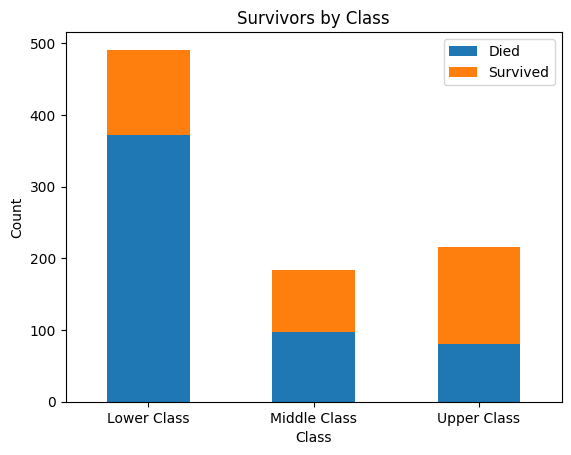

In [184]:
# Set figure size
plt.figure(figsize=(10, 5))

# Setup a figue of plots

class_ct.plot(kind='bar',
               stacked=True)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

#### Conclusions (Class)
Class is not a strong indicator for surviving, however Lower Class is a stong indicator for dying.

### Sex

In [185]:
# Survival count by sex
sex_ct = titanic_df.groupby('Sex')['Survival'].value_counts().unstack()
sex_ct

C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_26424\2723182350.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_ct = titanic_df.groupby('Sex')['Survival'].value_counts().unstack()


Survival,Died,Survived
Sex,,
Female,81,233
Male,468,109


In [186]:
# Survival rate by sex
titanic_df.groupby('Sex')['Survival'].value_counts(normalize = True).unstack()

C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_26424\3302204819.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby('Sex')['Survival'].value_counts(normalize = True).unstack()


Survival,Died,Survived
Sex,,
Female,0.257962,0.742038
Male,0.811092,0.188908


<Figure size 1000x500 with 0 Axes>

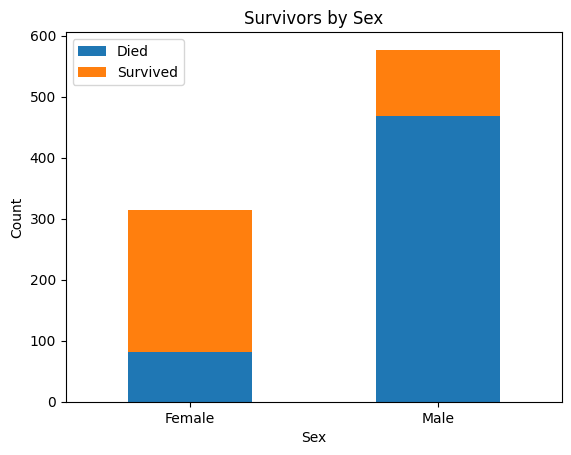

In [187]:
plt.figure(figsize=(10, 5))

sex_ct.plot(kind='bar',
               stacked=True)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

#### Conclusions (Sex)
Sex is a strong indicator for survivability, with a significant portion of females (74%) surviving and males 81% dying.

### Port Embarked

In [188]:
# Survival count by Port Embarked

embarked_ct = titanic_df.groupby('Ports')['Survival'].value_counts().unstack()
embarked_ct

C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_26424\2508407917.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  embarked_ct = titanic_df.groupby('Ports')['Survival'].value_counts().unstack()


Survival,Died,Survived
Ports,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


In [189]:
# Survival rate by Port embarked
titanic_df.groupby('Ports')['Survival'].value_counts(normalize = True).unstack()

C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_26424\1903294391.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby('Ports')['Survival'].value_counts(normalize = True).unstack()


Survival,Died,Survived
Ports,,
Cherbourg,0.446429,0.553571
Queenstown,0.610390,0.389610
Southampton,0.663043,0.336957


<Figure size 1000x500 with 0 Axes>

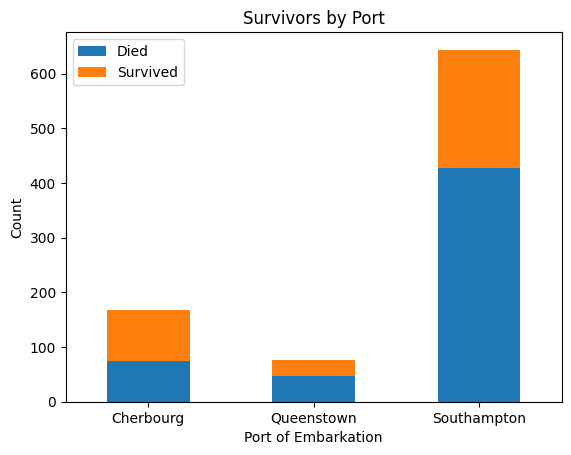

In [190]:
plt.figure(figsize=(10, 5))

embarked_ct.plot(kind='bar',
               stacked=True)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

#### Conclusions (Ports)
Port has no obvious correlation with survivability.

## Statistics

In [191]:
# Survival count by Sex, Port, Class and Age Category
embarked = titanic_df['Ports']
sex = titanic_df['Sex']
survived = titanic_df['Survival']
pclass = titanic_df['Class']
age_cat = titanic_df['Age_Categories']
pd.crosstab([sex, embarked, pclass], [survived, age_cat])

Survival                        Died                           Survived      \
Age_Categories                    10  20   30  40  50 60 70 80       10  20   
Sex    Ports       Class                                                      
Female Cherbourg   Lower Class     1   3    3   0   1  0  0  0        5   8   
                   Middle Class    0   0    0   0   0  0  0  0        1   2   
                   Upper Class     0   0    0   0   1  0  0  0        0   5   
       Queenstown  Lower Class     0   1    5   3   0  0  0  0        0  23   
                   Middle Class    0   0    0   0   0  0  0  0        0   0   
                   Upper Class     0   0    0   0   0  0  0  0        0   0   
       Southampton Lower Class    10   8   25   5   7  0  0  0        6   7   
                   Middle Class    0   0    3   1   1  1  0  0        7   6   
                   Upper Class     1   0    1   0   0  0  0  0        0   8   
Male   Cherbourg   Lower Class     0   4   23   5   1  0  0  0        1   3   
                   Middle Class    0   0    4   4   0  0  0  0        1   1   
                   Upper Class     0   1    6   3   8  4  1  2        0   1   
       Queenstown  Lower Class     4   1   25   3   1  0  1  1        0   0   
                   Middle Class    0   0    0   0   0  1  0  0        0   0   
                   Upper Class     0   0    0   0   1  0  0  0        0   0   
       Southampton Lower Class    10  42  120  34  18  5  1  1        7   4   
                   Middle Class    0   9   29  26   8  8  2  0        8   2   
                   Upper Class     0   2    4   9  22  6  8  0        2   1   

Survival                                             
Age_Categories                   30  40 50 60 70 80  
Sex    Ports       Class                             
Female Cherbourg   Lower Class    2   0  0  0  0  0  
                   Middle Class   4   0  0  0  0  0  
                   Upper Class   10  14  7  6  0  0  
       Queenstown  Lower Class    1   0  0  0  0  0  
                   Middle Class   2   0  0  0  0  0  
                   Upper Class    0   1  0  0  0  0  
       Southampton Lower Class   13   6  0  0  1  0  
                   Middle Class  21  16  9  2  0  0  
                   Upper Class   10  17  5  5  1  0  
Male   Cherbourg   Lower Class    6   0  0  0  0  0  
                   Middle Class   0   0  0  0  0  0  
                   Upper Class    5   6  3  2  0  0  
       Queenstown  Lower Class    3   0  0  0  0  0  
                   Middle Class   0   0  0  0  0  0  
                   Upper Class    0   0  0  0  0  0  
       Southampton Lower Class   14   7  2  0  0  0  
                   Middle Class   0   3  1  0  1  0  
                   Upper Class    4  12  6  2  0  1

### OLS Regression Models

In [192]:
import statsmodels.formula.api as sm

In [193]:
#cast Survived to int for use with Ordinary Least Squares regression model requirements (numerical values, ie. non-bool, non-str)
titanic_df.Survived = titanic_df.Survived.astype(int)

In [194]:
# OLS modeling for Survived and Sex
result_1 = sm.ols(formula='Survived ~ Sex', data=titanic_df).fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     372.4
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.41e-69
Time:                        12:17:43   Log-Likelihood:                -466.09
No. Observations:                 891   AIC:                             936.2
Df Residuals:                     889   BIC:                             945.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7420      0.023     32.171      0.000       0.697       0.787
Sex[T.Male]    -0.5531      0.029    -19.298      0.000      -0.609      -0.497
==============================================================================
Omnibus:                       25.424   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.169
Skew:                           0.427   Prob(JB):                     1.26e-06
Kurtosis:                       2.963   Cond. No.                         3.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
# OLS modeling for Survived and Class
result_2 = sm.ols(formula='Survived ~ Class', data=titanic_df).fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     57.96
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           2.18e-24
Time:                        12:17:43   Log-Likelihood:                -567.30
No. Observations:                 891   AIC:                             1141.
Df Residuals:                     888   BIC:                             1155.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2424      0.021     11.722      0.000       0.202       0.283
Class[T.Middle Class]     0.2305      0.040      5.820      0.000       0.153       0.308
Class[T.Upper Class]      0.3873      0.037     10.353      0.000       0.314       0.461
==============================================================================
Omnibus:                     1364.423   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.840
Skew:                           0.421   Prob(JB):                     1.39e-19
Kurtosis:                       1.723   Cond. No.                         3.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
# OLS modeling for Survived and Ports
result_3 = sm.ols(formula='Survived ~ Ports', data=titanic_df).fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     13.61
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.51e-06
Time:                        12:17:43   Log-Likelihood:                -606.51
No. Observations:                 889   AIC:                             1219.
Df Residuals:                     886   BIC:                             1233.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5536      0.037     14.964      0.000       0.481       0.626
Ports[T.Queenstown]     -0.1640      0.066     -2.485      0.013      -0.293      -0.034
Ports[T.Southampton]    -0.2166      0.042     -5.215      0.000      -0.298      -0.135
==============================================================================
Omnibus:                     4768.382   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.479
Skew:                           0.477   Prob(JB):                     1.04e-29
Kurtosis:                       1.359   Cond. No.                         5.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
# OLS modeling for Survived and Age_Fill
result_4 = sm.ols(formula='Survived ~ Age_Fill', data=titanic_df).fit()
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.998
Date:                Fri, 12 Jan 2024   Prob (F-statistic):            0.00479
Time:                        12:17:43   Log-Likelihood:                -617.97
No. Observations:                 891   AIC:                             1240.
Df Residuals:                     889   BIC:                             1250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4847      0.039     12.372      0.000       0.408       0.562
Age_Fill      -0.0034      0.001     -2.828      0.005      -0.006      -0.001
==============================================================================
Omnibus:                     4214.198   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.594
Skew:                           0.474   Prob(JB):                     2.42e-32
Kurtosis:                       1.262   Cond. No.                         77.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
# OLS modeling for Survived and Age_Categories
result_4_1 = sm.ols(formula='Survived ~ Age_Categories', data=titanic_df).fit()
result_4_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     7.107
Date:                Fri, 12 Jan 2024   Prob (F-statistic):            0.00782
Time:                        12:17:44   Log-Likelihood:                -618.41
No. Observations:                 891   AIC:                             1241.
Df Residuals:                     889   BIC:                             1250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4915      0.044     11.288      0.000       0.406       0.577
Age_Categories    -0.0032      0.001     -2.666      0.008      -0.006      -0.001
==============================================================================
Omnibus:                     4193.043   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.109
Skew:                           0.474   Prob(JB):                     1.87e-32
Kurtosis:                       1.257   Cond. No.                         97.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
# OLS modeling for Survived and Sex + Class + Age_Fill
result_5 = sm.ols(formula='Survived ~ Sex + Class + Age_Fill', data=titanic_df).fit()
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     144.0
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           7.26e-95
Time:                        12:17:44   Log-Likelihood:                -398.78
No. Observations:                 891   AIC:                             807.6
Df Residuals:                     886   BIC:                             831.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7504      0.034     21.776      0.000       0.683       0.818
Sex[T.Male]              -0.4845      0.027    -17.708      0.000      -0.538      -0.431
Class[T.Middle Class]     0.2036      0.033      6.087      0.000       0.138       0.269
Class[T.Upper Class]      0.4069      0.035     11.747      0.000       0.339       0.475
Age_Fill                 -0.0066      0.001     -6.200      0.000      -0.009      -0.005
==============================================================================
Omnibus:                       34.024   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.990
Skew:                           0.494   Prob(JB):                     9.28e-09
Kurtosis:                       3.143   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
# OLS modeling for Survived and Sex + Class + Age_Categories
result_5_1 = sm.ols(formula='Survived ~ Sex + Class + Age_Categories', data=titanic_df).fit()
result_5_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     142.8
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           3.43e-94
Time:                        12:17:44   Log-Likelihood:                -400.35
No. Observations:                 891   AIC:                             810.7
Df Residuals:                     886   BIC:                             834.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7684      0.037     20.575      0.000       0.695       0.842
Sex[T.Male]              -0.4854      0.027    -17.696      0.000      -0.539      -0.432
Class[T.Middle Class]     0.2042      0.034      6.083      0.000       0.138       0.270
Class[T.Upper Class]      0.4030      0.035     11.615      0.000       0.335       0.471
Age_Categories           -0.0062      0.001     -5.932      0.000      -0.008      -0.004
==============================================================================
Omnibus:                       36.634   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.146
Skew:                           0.514   Prob(JB):                     1.92e-09
Kurtosis:                       3.155   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
# OLS modeling for Survived and Sex + Class + Age_Fill + Ports
result_6 = sm.ols(formula='Survived ~ Sex + Class + Age_Fill + Ports', data=titanic_df).fit()
result_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     96.61
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           2.77e-93
Time:                        12:17:44   Log-Likelihood:                -395.42
No. Observations:                 889   AIC:                             804.8
Df Residuals:                     882   BIC:                             838.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7992      0.044     18.177      0.000       0.713       0.886
Sex[T.Male]              -0.4757      0.028    -17.230      0.000      -0.530      -0.422
Class[T.Middle Class]     0.2163      0.034      6.342      0.000       0.149       0.283
Class[T.Upper Class]      0.3941      0.036     10.816      0.000       0.323       0.466
Ports[T.Queenstown]      -0.0104      0.055     -0.190      0.849      -0.118       0.097
Ports[T.Southampton]     -0.0777      0.034     -2.252      0.025      -0.145      -0.010
Age_Fill                 -0.0065      0.001     -6.095      0.000      -0.009      -0.004
==============================================================================
Omnibus:                       36.337   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.800
Skew:                           0.513   Prob(JB):                     2.28e-09
Kurtosis:                       3.150   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
# OLS modeling for Survived and Sex + Class + Age_Categories + Ports
result_6_1 = sm.ols(formula='Survived ~ Sex + Class + Age_Categories + Ports', data=titanic_df).fit()
result_6_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     95.65
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.58e-92
Time:                        12:17:44   Log-Likelihood:                -397.19
No. Observations:                 889   AIC:                             808.4
Df Residuals:                     882   BIC:                             841.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.8165      0.046     17.692      0.000       0.726       0.907
Sex[T.Male]              -0.4772      0.028    -17.248      0.000      -0.531      -0.423
Class[T.Middle Class]     0.2157      0.034      6.307      0.000       0.149       0.283
Class[T.Upper Class]      0.3891      0.036     10.666      0.000       0.317       0.461
Ports[T.Queenstown]      -0.0159      0.055     -0.289      0.773      -0.124       0.092
Ports[T.Southampton]     -0.0768      0.035     -2.220      0.027      -0.145      -0.009
Age_Categories           -0.0061      0.001     -5.787      0.000      -0.008      -0.004
==============================================================================
Omnibus:                       38.841   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.871
Skew:                           0.532   Prob(JB):                     4.90e-10
Kurtosis:                       3.160   Cond. No.                         192.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
# Dataframe for statistical data
comp_index_5 = 'Sex + Class + Age_Fill'
comp_index_5_1 = 'Sex + Class + Age_Categories'
comp_index_6 = 'Sex + Class + Age_Fill + Ports'
comp_index_6_1 = 'Sex + Class + Age_Categories + Ports'

statistics_df = pd.DataFrame(
    data=[[result_1.rsquared_adj, np.sqrt(result_1.rsquared_adj)],
          [result_2.rsquared_adj, np.sqrt(result_2.rsquared_adj)],
          [result_3.rsquared_adj, np.sqrt(result_3.rsquared_adj)],
          [result_4.rsquared_adj, np.sqrt(result_4.rsquared_adj)],
          [result_4_1.rsquared_adj, np.sqrt(result_4_1.rsquared_adj)],
          [result_5.rsquared_adj, np.sqrt(result_5.rsquared_adj)],
          [result_5_1.rsquared_adj, np.sqrt(result_5_1.rsquared_adj)],
          [result_6.rsquared_adj, np.sqrt(result_6.rsquared_adj)],
          [result_6_1.rsquared_adj, np.sqrt(result_6_1.rsquared_adj)]],
    index=['Sex', 'Class', 'Ports', 'Age_Fill', 'Age_Categories', comp_index_5, comp_index_5_1, comp_index_6, comp_index_6_1],
    columns=['R-squared', 'Correlation to Survival']
)

statistics_df

,R-squared,Correlation to Survival
Sex,0.294438,0.542621
Class,0.113484,0.336873
Ports,0.027606,0.166152
Age_Fill,0.007802,0.088329
Age_Categories,0.006815,0.082555
Sex + Class + Age_Fill,0.391324,0.625559
Sex + Class + Age_Categories,0.389179,0.623842
Sex + Class + Age_Fill + Ports,0.392479,0.626481
Sex + Class + Age_Categories + Ports,0.390056,0.624545


### Conclusions

Ordinary least squares (OLS) regression modeling has been used to determine which metric or combination of metrics provides the best prediction of survival.  

As can be determined by reviewing the coefficient of determination (R-squared), the individual models for Ports, Age_Fill and Age_Categories indicate a large proportion of variance for survival. \
Sex and a combination of metrics are better models.
Age_Categories has a (slightly) worse influence on correlation than Age_Fill in all metrics.

The square root of R-squared equals the Pearson correlation coefficient of predicted to actual values; Sex is the single metric with the strongest correlation. \
However, the combination of metrics, Sex + Class + Age_Fill + Ports, shows the strongest correlation to survival for the model used, and the metric Sex + Class + Age_Fill a close second strongest.